# <b>1 - Preprocessing part</b>

<b>First, I did import pandas to read the csv file and do some transformation.</b><br>
<b>We can see the file which passed to the function is an Excel file, due to the inability to retrieve any data from the original csv file.</b><br>
<b>In the first step, we will take a look at some data with <em>head()</em> function to get an idea about the elements on the dataset.</b>

In [1]:
import pandas as pd

df=pd.read_excel('titanic-passengers.xlsx')
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


<b>Next step, we will get some info about the type of elements composing each column and the number of non-null ones.</b>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


<b>On this step, we will pick-up the number of null elements ( Nan element ) on each column, so we can deal with them ( replace or drop regarding the importance of the features).</b>

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<b>first, we use the function describe() on each of the 3 columns ( "Age", "Cabin" and "Embarked" ) to get some info so we can replace the NaN values.</b><br>
<b>After gathering some info, we use the function fillna() to replace the NaN values with specific ones. Then we verify if there is no more missing value.</b>

In [4]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<b>mean_age is the average age value of all passengers ages</b>

In [5]:
mean_age=round(df['Age'].mean())
mean_age

30

In [6]:
df['Age'].fillna(mean_age, inplace=True)
df['Age'].isnull().sum()

0

<b>The next code line output different value counts for each unique cabin value.</b><br>
<b>So, I did choose G6 randomly because that value will not disturb our work and don't impact survival of people.</b>

In [7]:
df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
D              3
              ..
B79            1
E50            1
D11            1
E63            1
E40            1
Name: Cabin, Length: 147, dtype: int64

In [8]:
df["Cabin"].fillna("G6",inplace=True)
df["Cabin"].isnull().sum()

0

<b>I did choose the value S when I replaced the 2 missing values because it's the most common one.</b>

In [9]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df['Embarked'].fillna('S', inplace=True)
df["Embarked"].isnull().sum()

0

<b>In this last step, we verify over the all data frame if there is no more missing values with the 2 functions isnull() and info()</b>

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


# <b>2 - Visualization part<b>

<b>We start with importing matplotlib and seaborn wiche will we will need for ploting </b>

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

## <b>A - distribution of the most important features based on my understanding of the dataset and the problem</b>

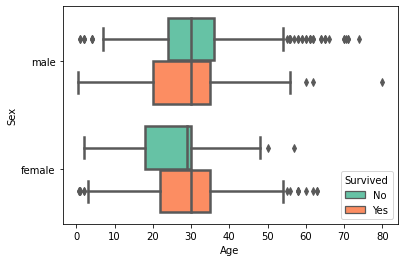

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
scaler=StandardScaler()

newdf1=df.drop(["PassengerId",'Pclass',"Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"],axis=1)

sns.boxplot(x="Age",y="Sex",data=newdf1,orient="h",palette="Set2",saturation=1,hue="Survived",linewidth=2.5)

<b>As we can seen, the distribution of survivors and non-survivors differs by sex and age. We see that there are many more men who haven't survived mainly between 20, 35 and over 50 years.<br>
Also, the number of men who survived is very low compared to the number of deaths. Unlike women who have more survivors compared to the number of deaths in the same age groups.<br>
So, with these results, we can conclude that there is a higher chance of survival for women aged 20-35 than for men at the same age.</b>

## <b>B - Correlation between Sex and Age concerning their importance in the survival of the individuals</b>

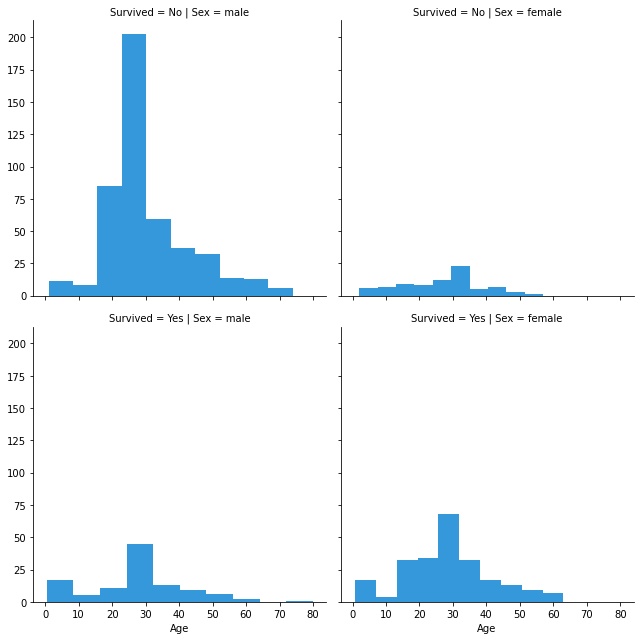

In [15]:
grid =sns.FacetGrid(newdf1,row='Survived',col='Sex',height=4.5,aspect=1)
grid.map(plt.hist,'Age',bins=10,color="#3498db")

<b>As we plot the correlation between sex and age regarding the survival of persons, we can see there is a special correlation. That means the number of peoples who survived or not follow the augmentation of the age until a certain point (positive correlation until 30 years old) than it's inverse and become a negative correlation where the number of persons who survived or not decrease with the augmentation of age. Also, there is another factor that changes the amount of augmentation or decreasing, it's the sex gender. This impact is explained in previous title.</b>

## <b>C - impact of Pclass and Fare on the survival of the individuals</b>

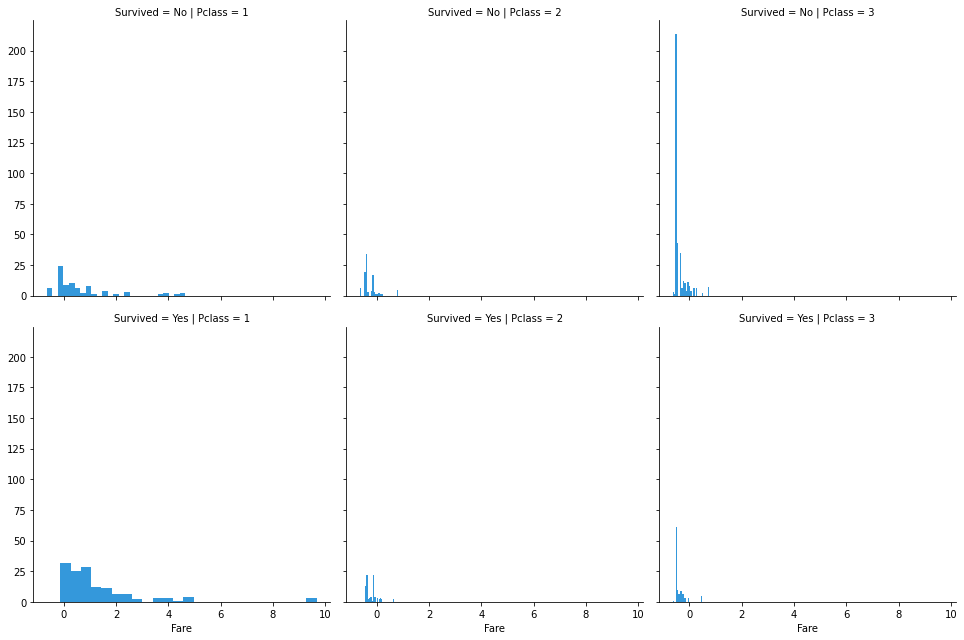

In [16]:
newdf2=df.drop(["PassengerId","Age","Sex","Name","SibSp","Parch","Ticket","Cabin","Embarked"],axis=1)

newdf2["Fare"]=scaler.fit_transform(newdf2["Fare"].values.reshape(-1, 1))

grid2 =sns.FacetGrid(newdf2,row='Survived',col='Pclass',height=4.5,aspect=1)
grid2.map(plt.hist,'Fare',bins=25,color="#3498db")

<b>We can notice that people in the 1st class have more chances of surviving compared to the other 2 classes. In the opposite direction, people in the 3rd class have more chances of not surviving. Concerning the 2 nd class, they have approximately 50% chances to survive or not.<br>
We also notice that the fare does not influence the survival of people.</b>

## <b>D - Trying the function</b>

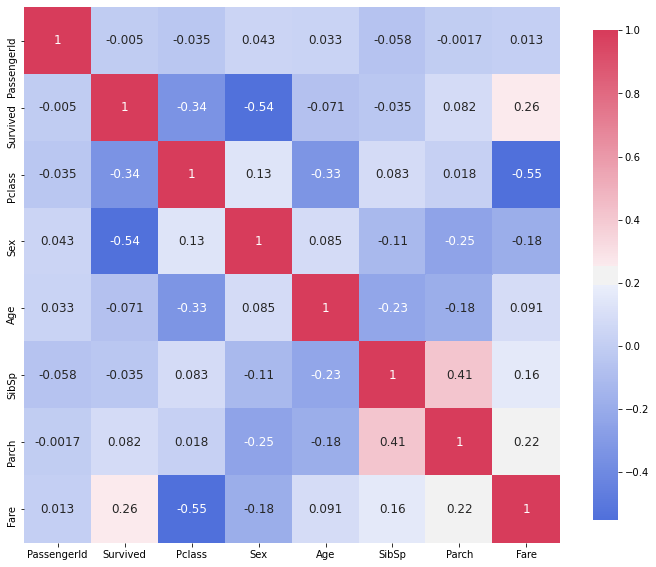

In [17]:
def plot_correlation_map(ds):
    corr = ds.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 260 , 5 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )


df["Survived"]=encoder.fit_transform(df["Survived"])
df["Sex"]=encoder.fit_transform(df["Sex"])

plot_correlation_map(df)

<b><em>analysis</em><br>
The first thing we can notice, the function takes as a parameter the whole data frame. On the first line of the function, there is a variable called corr, it represents the correlation between each numeric characteristic and this is done by applying the corr () function directly to the data frame. Next, we create a figure "s" which will contain a single "ax" subplot. On the third line, we create a color map with seaborn.diverging_palette () then we specify that we will use it as a color map with the parameter as-cmap to get in return matplotlib colormap object rather than a list of colors, so we can use it on the last code line.<br>
Finally, in the last code line, we apply a heatmap on the figure "s".The heatmap function plot rectangular data as a color-encoded matrix. We provide to the function many parameters, one those are the data we want to use "corr variable"  so we can get a heatmap with all correlation between each feature and another one.<br>
The main purpose of this function is to create a plot that shows the calculated correlation between all the features so we can get an idea about the impact of an attribute over the rest of the features</b>

In [18]:
newdf2[["Survived","Pclass"]].groupby(["Survived"],as_index=True).mean()

,Pclass
Survived,
No,2.531876
Yes,1.950292


<b>The groupby function just shows us the same constatation we did earlier on title C.There is a positive correlation between the Pclass and survival of persons. There are more chances to survive for people who are in 1st and fewer chances for people in 2 nd and 3 rd class.</b>

## <b>E - Correlation of Title with other features</b>

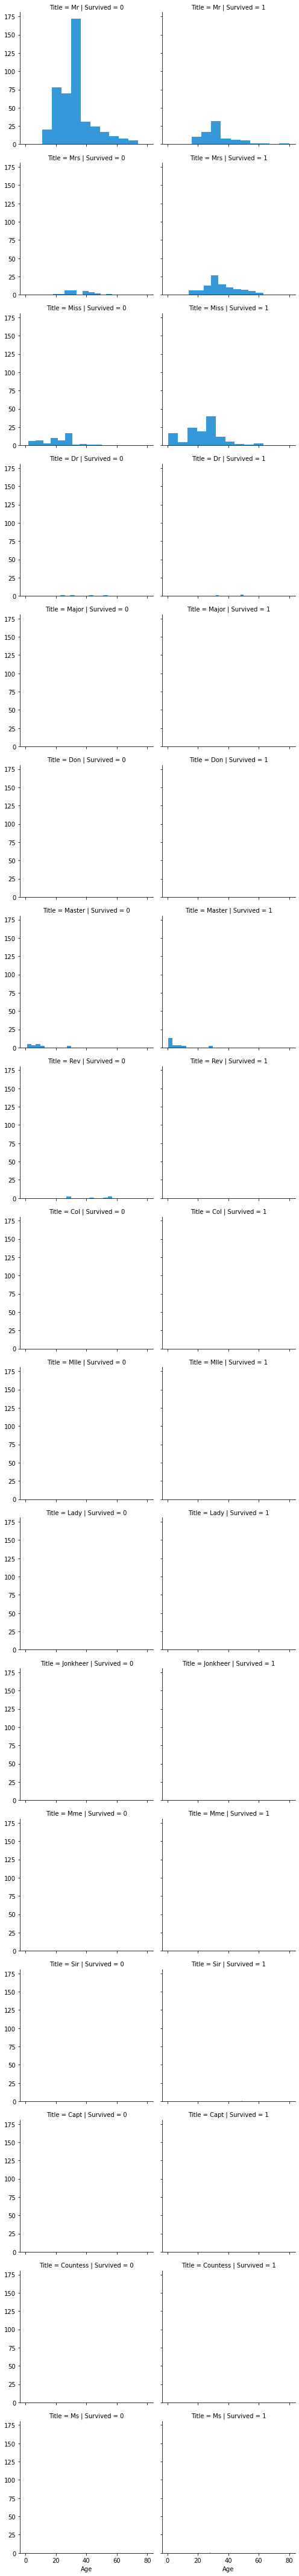

In [19]:
for dataset in [df]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
df["Title"].value_counts()

grid3 =sns.FacetGrid(df,row='Title',col='Survived',height=3.5,aspect=1)
grid3.map(plt.hist,'Age',color="#3498db")

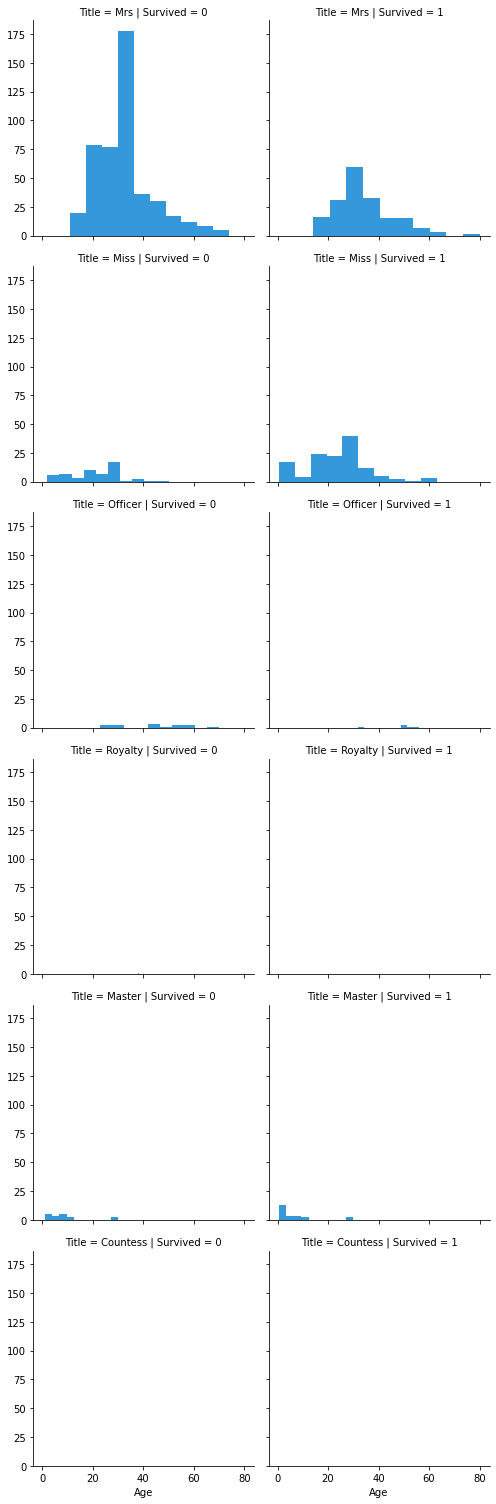

In [20]:
df = df.drop(["Name"],axis=1)

for dataset in [df]:
    dataset['Title'] = dataset['Title'].replace(["Capt","Col","Major","Dr","Rev"], "Officer")
    dataset['Title'] = dataset['Title'].replace(["Jonkheer","Don","Sir","Lady","the Countess","Dona"], "Royalty")
    dataset['Title'] = dataset['Title'].replace(["Mme","Mlle","Miss"], "Miss")
    dataset['Title'] = dataset['Title'].replace(["Ms","Mr","Mrs"], "Mrs")
    dataset['Title'] = dataset['Title'].replace(["Master"], "Master")
    

grid3 =sns.FacetGrid(df,row='Title',col='Survived',height=3.5,aspect=1)
grid3.map(plt.hist,'Age',color="#3498db")

## <b>F - Creating familysize features</b>

In [21]:
df["FamilySize"]=df["SibSp"]+df["Parch"]
df.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,0,2,1,28.0,0,0,248740,13.0000,G6,S,Mrs,0
1,76,0,3,1,25.0,0,0,348123,7.6500,F G73,S,Mrs,0
2,641,0,3,1,20.0,0,0,350050,7.8542,G6,S,Mrs,0
3,568,0,3,0,29.0,0,4,349909,21.0750,G6,S,Mrs,4
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,1
5,105,0,3,1,37.0,2,0,3101276,7.9250,G6,S,Mrs,2
6,576,0,3,1,19.0,0,0,358585,14.5000,G6,S,Mrs,0
7,382,1,3,0,1.0,0,2,2653,15.7417,G6,C,Miss,2
8,228,0,3,1,20.5,0,0,A/5 21173,7.2500,G6,S,Mrs,0
9,433,1,2,0,42.0,1,0,SC/AH 3085,26.0000,G6,S,Mrs,1


In [31]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033019,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.070657,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.329727,0.083081,0.018443,-0.549500,0.065997
Sex,0.042939,-0.543351,0.131900,1.000000,0.084660,-0.114631,-0.245489,-0.182333,-0.200988
Age,0.033019,-0.070657,-0.329727,0.084660,1.000000,-0.232440,-0.180330,0.090632,-0.248954
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232440,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.180330,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,-0.182333,0.090632,0.159651,0.216225,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.200988,-0.248954,0.890712,0.783111,0.217138,1.000000


In [32]:
df[["Survived","FamilySize"]].groupby(["Survived"],as_index=True).mean()

,FamilySize
Survived,
0,0.883424
1,0.938596


<b>From the last 2 commande output we can notice there is positive correlation between Familysize and survived, so we can conclued that familysize features is usefull to predict the survival of peoples.</b>